# Homework 5 - Data Visualization

## 1. Data set import - Caesarian

<p>
This data set takes in a person's data and determines if they needed to have a C-Section
</p>

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/caesarian.csv"
cd = pd.read_csv(url)
cd.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,False
1,26,2,0,1,0,True
2,26,2,1,1,0,False
3,28,1,0,2,0,False
4,22,2,0,1,0,True


<Axes: ylabel='Frequency'>

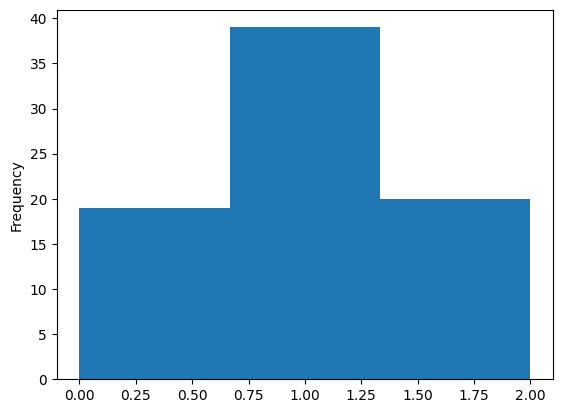

In [5]:
cd['Blood of Pressure'].plot.hist(bins=3)

<Axes: ylabel='Density'>

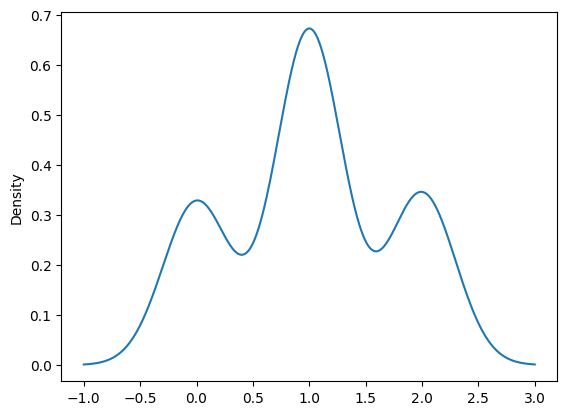

In [6]:
cd['Blood of Pressure'].plot.kde()

In [7]:
cd['Blood of Pressure'].value_counts()

Blood of Pressure
1    39
2    20
0    19
Name: count, dtype: int64

<Axes: xlabel='Blood of Pressure'>

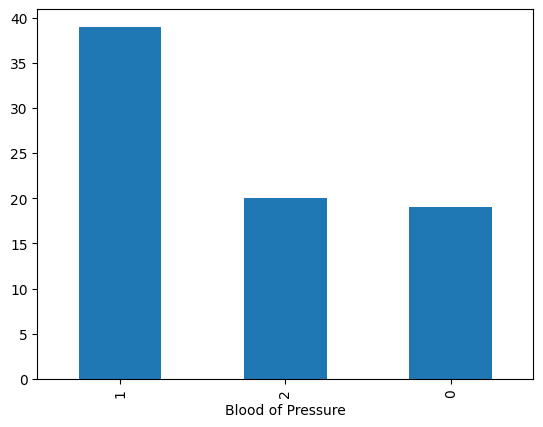

In [8]:
cd['Blood of Pressure'].value_counts().plot.bar()

<Axes: ylabel='count'>

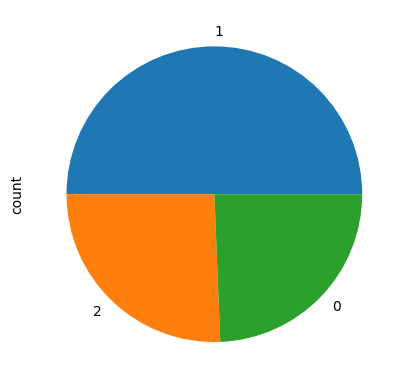

In [10]:
plot_series = cd['Blood of Pressure']
plot_series.name = ''
plot_series.value_counts().plot.pie()

<Axes: xlabel='Age', ylabel='Blood of Pressure'>

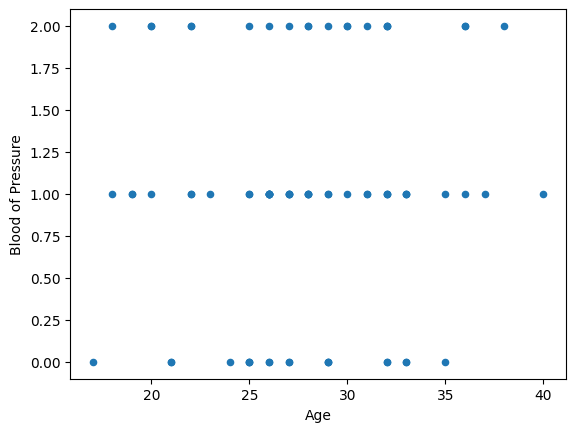

In [16]:
cd.plot.scatter(x='Age', y='Blood of Pressure')

### Decision tree

# Part 1: Exploratory Data Analysis & Visualization

<p>
<ul>
<li><b>Are your numerical independent variables uni- or multimodal? Validate your answer with appropriate density plots/histograms.</b>
</ul>
The numerical independent variables are multimodal. Taking a look at the density plot, you can see the curve has multiple peaks.

<ul>
<li><b>Can you identify clusters when performing scatter plots? Are those clusters intuitive given the nature of the data set or are they surprising?</b>
</ul>
There are not clear clusters when performing a scatter plot. I do find it interesting to see there is no correlation to age and Caesarian

<ul>
<li><b>Are those clusters related to your decision tree model from the last lab?</b>
</ul>
No they are not

<ul>
<li><b>What about the different labels/levels of your dependent variable - are they equally represented, that is, is your data set well balanced? If so why, if not how do you think the imbalance shows up in your tree model?</b>
</ul>
No, the dataset is not 100% balanced as there is a clear uneven distribution among the decision tree. I believe this showed up because of a large variation in the data
</p>

if Heart Problem =< 0.5: 
  |then if Age =< 21.5: 
  |  |then if Age =< 18.5: 
  |  |  |then if Age =< 17.5: 
  |  |  |  |then True
  |  |  |  |else False
  |  |  |else True
  |  |else if Delivery number =< 2.5: 
  |  |  |then if Age =< 31.5: 
  |  |  |  |then if Age =< 29.5: 
  |  |  |  |  |then if Age =< 28.5: 
  |  |  |  |  |  |then if Age =< 27.5: 
  |  |  |  |  |  |  |then if Delivery time =< 0.5: 
  |  |  |  |  |  |  |  |then if Age =< 26.5: 
  |  |  |  |  |  |  |  |  |then if Age =< 23.5: 
  |  |  |  |  |  |  |  |  |  |then if Blood of Pressure =< 1.5: 
  |  |  |  |  |  |  |  |  |  |  |then True
  |  |  |  |  |  |  |  |  |  |  |else False
  |  |  |  |  |  |  |  |  |  |else if Blood of Pressure =< 1.5: 
  |  |  |  |  |  |  |  |  |  |  |then if Blood of Pressure =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |  |then False
  |  |  |  |  |  |  |  |  |  |  |  |else if Age =< 25.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then False
  |  |  |  |  |  |  |  |  |  |  |  |  |else if Delivery nu

[Text(0.5969827586206896, 0.9666666666666667, 'Heart Problem <= 0.5\nentropy = 0.983\nsamples = 78\nvalue = [33, 45]\nclass = True'),
 Text(0.40086206896551724, 0.9, 'Age <= 21.5\nentropy = 0.989\nsamples = 48\nvalue = [27, 21]\nclass = False'),
 Text(0.27586206896551724, 0.8333333333333334, 'Age <= 18.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]\nclass = True'),
 Text(0.2413793103448276, 0.7666666666666667, 'Age <= 17.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = False'),
 Text(0.20689655172413793, 0.7, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = True'),
 Text(0.27586206896551724, 0.7, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = False'),
 Text(0.3103448275862069, 0.7666666666666667, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = True'),
 Text(0.5258620689655172, 0.8333333333333334, 'Delivery number <= 2.5\nentropy = 0.959\nsamples = 42\nvalue = [26, 16]\nclass = False'),
 Text(0.43103448275862066, 0.7666666666666667, 'Age <= 31.5\nentropy = 0.909\nsa

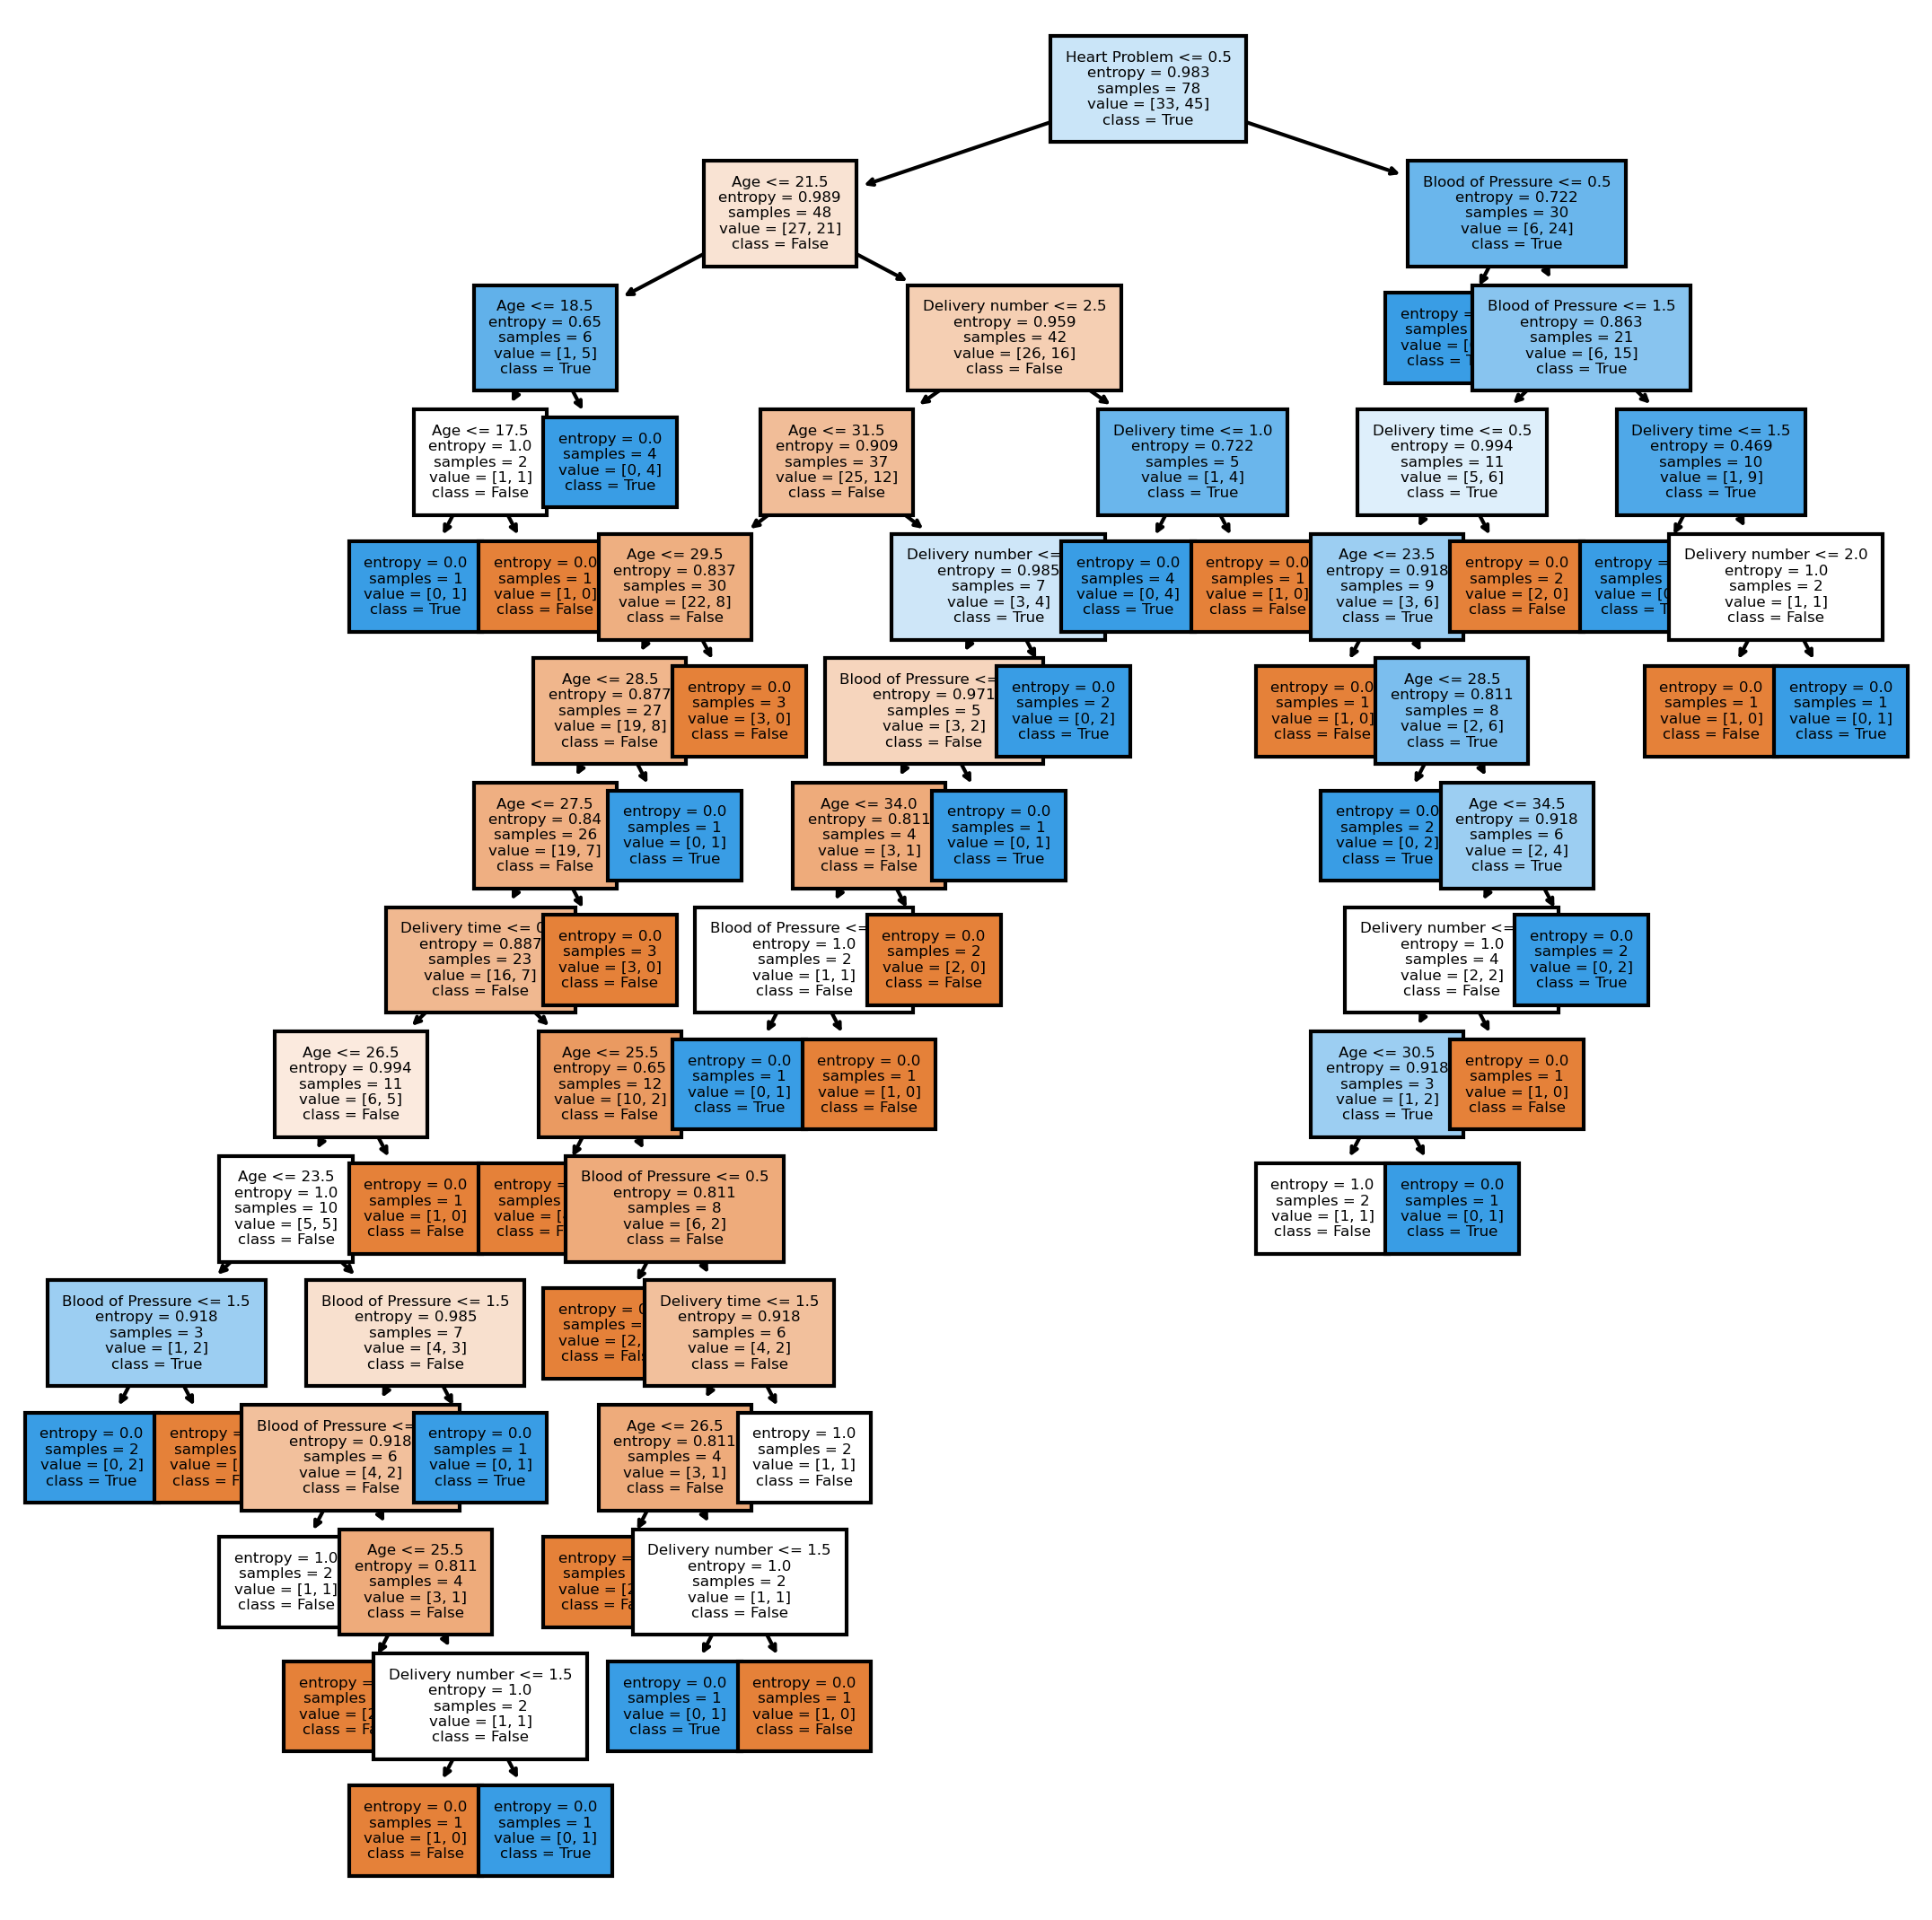

In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/caesarian.csv"
cd = pd.read_csv(url)
cd

from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

features_cd = cd.drop(['Caesarian'], axis=1)
features_cd.head()
target_cd = pd.DataFrame(cd['Caesarian'])
target_cd.head()
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_cd, target_cd)
tree_print(dtree, features_cd)
target_cd['Caesarian'].unique()
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
class_names = target_cd['Caesarian'].unique().astype(str)
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300)
plot_tree(dtree, fontsize=4, filled=True,
          feature_names=features_cd.columns,
          class_names=class_names)


Check the accuracy of the model

In [6]:
predict_array = dtree.predict(features_cd)
predicted_labels = pd.DataFrame(predict_array)
predicted_labels.columns = ['Caesarian']
predicted_labels.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [7]:
target_cd.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [8]:
predicted_labels.equals(target_cd)

False

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_cd, predicted_labels)
accuracy

0.9615384615384616

### 2. Find the simplest decision tree model whose accuracy is at least 80% or better than the accuracy of the unrestricted model. E.g. if your unrestricted model had an accuracy of 0.95 then the simplified model should have an accuracy of not less than 0.95*0.8=0.75 or 75%.

if Heart Problem =< 0.5: 
  |then if Age =< 21.5: 
  |  |then if Age =< 18.5: 
  |  |  |then if Blood of Pressure =< 0.5: 
  |  |  |  |then True
  |  |  |  |else False
  |  |  |else True
  |  |else if Delivery number =< 2.5: 
  |  |  |then if Age =< 31.5: 
  |  |  |  |then if Age =< 29.5: 
  |  |  |  |  |then if Age =< 28.5: 
  |  |  |  |  |  |then if Age =< 27.5: 
  |  |  |  |  |  |  |then if Delivery time =< 0.5: 
  |  |  |  |  |  |  |  |then if Age =< 26.5: 
  |  |  |  |  |  |  |  |  |then if Delivery number =< 1.5: 
  |  |  |  |  |  |  |  |  |  |then if Blood of Pressure =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |then False
  |  |  |  |  |  |  |  |  |  |  |else if Blood of Pressure =< 1.5: 
  |  |  |  |  |  |  |  |  |  |  |  |then if Age =< 23.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then True
  |  |  |  |  |  |  |  |  |  |  |  |  |else False
  |  |  |  |  |  |  |  |  |  |  |  |else if Age =< 24.0: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then False
  |  |  |  |  |  |  |  |  |  |  

[Text(0.5416666666666666, 0.875, 'Heart Problem <= 0.5\nentropy = 0.983\nsamples = 78\nvalue = [33, 45]\nclass = True'),
 Text(0.3333333333333333, 0.625, 'Age <= 21.5\nentropy = 0.989\nsamples = 48\nvalue = [27, 21]\nclass = False'),
 Text(0.16666666666666666, 0.375, 'Age <= 18.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]\nclass = True'),
 Text(0.08333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.25, 0.125, '\n  (...)  \n'),
 Text(0.5, 0.375, 'Delivery number <= 2.5\nentropy = 0.959\nsamples = 42\nvalue = [26, 16]\nclass = False'),
 Text(0.4166666666666667, 0.125, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Blood of Pressure <= 0.5\nentropy = 0.722\nsamples = 30\nvalue = [6, 24]\nclass = True'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = True'),
 Text(0.8333333333333334, 0.375, 'Blood of Pressure <= 1.5\nentropy = 0.863\nsamples = 21\nvalue = [6, 15]\nclass = True'),
 Text(0.75, 0.125, '\n  (...)

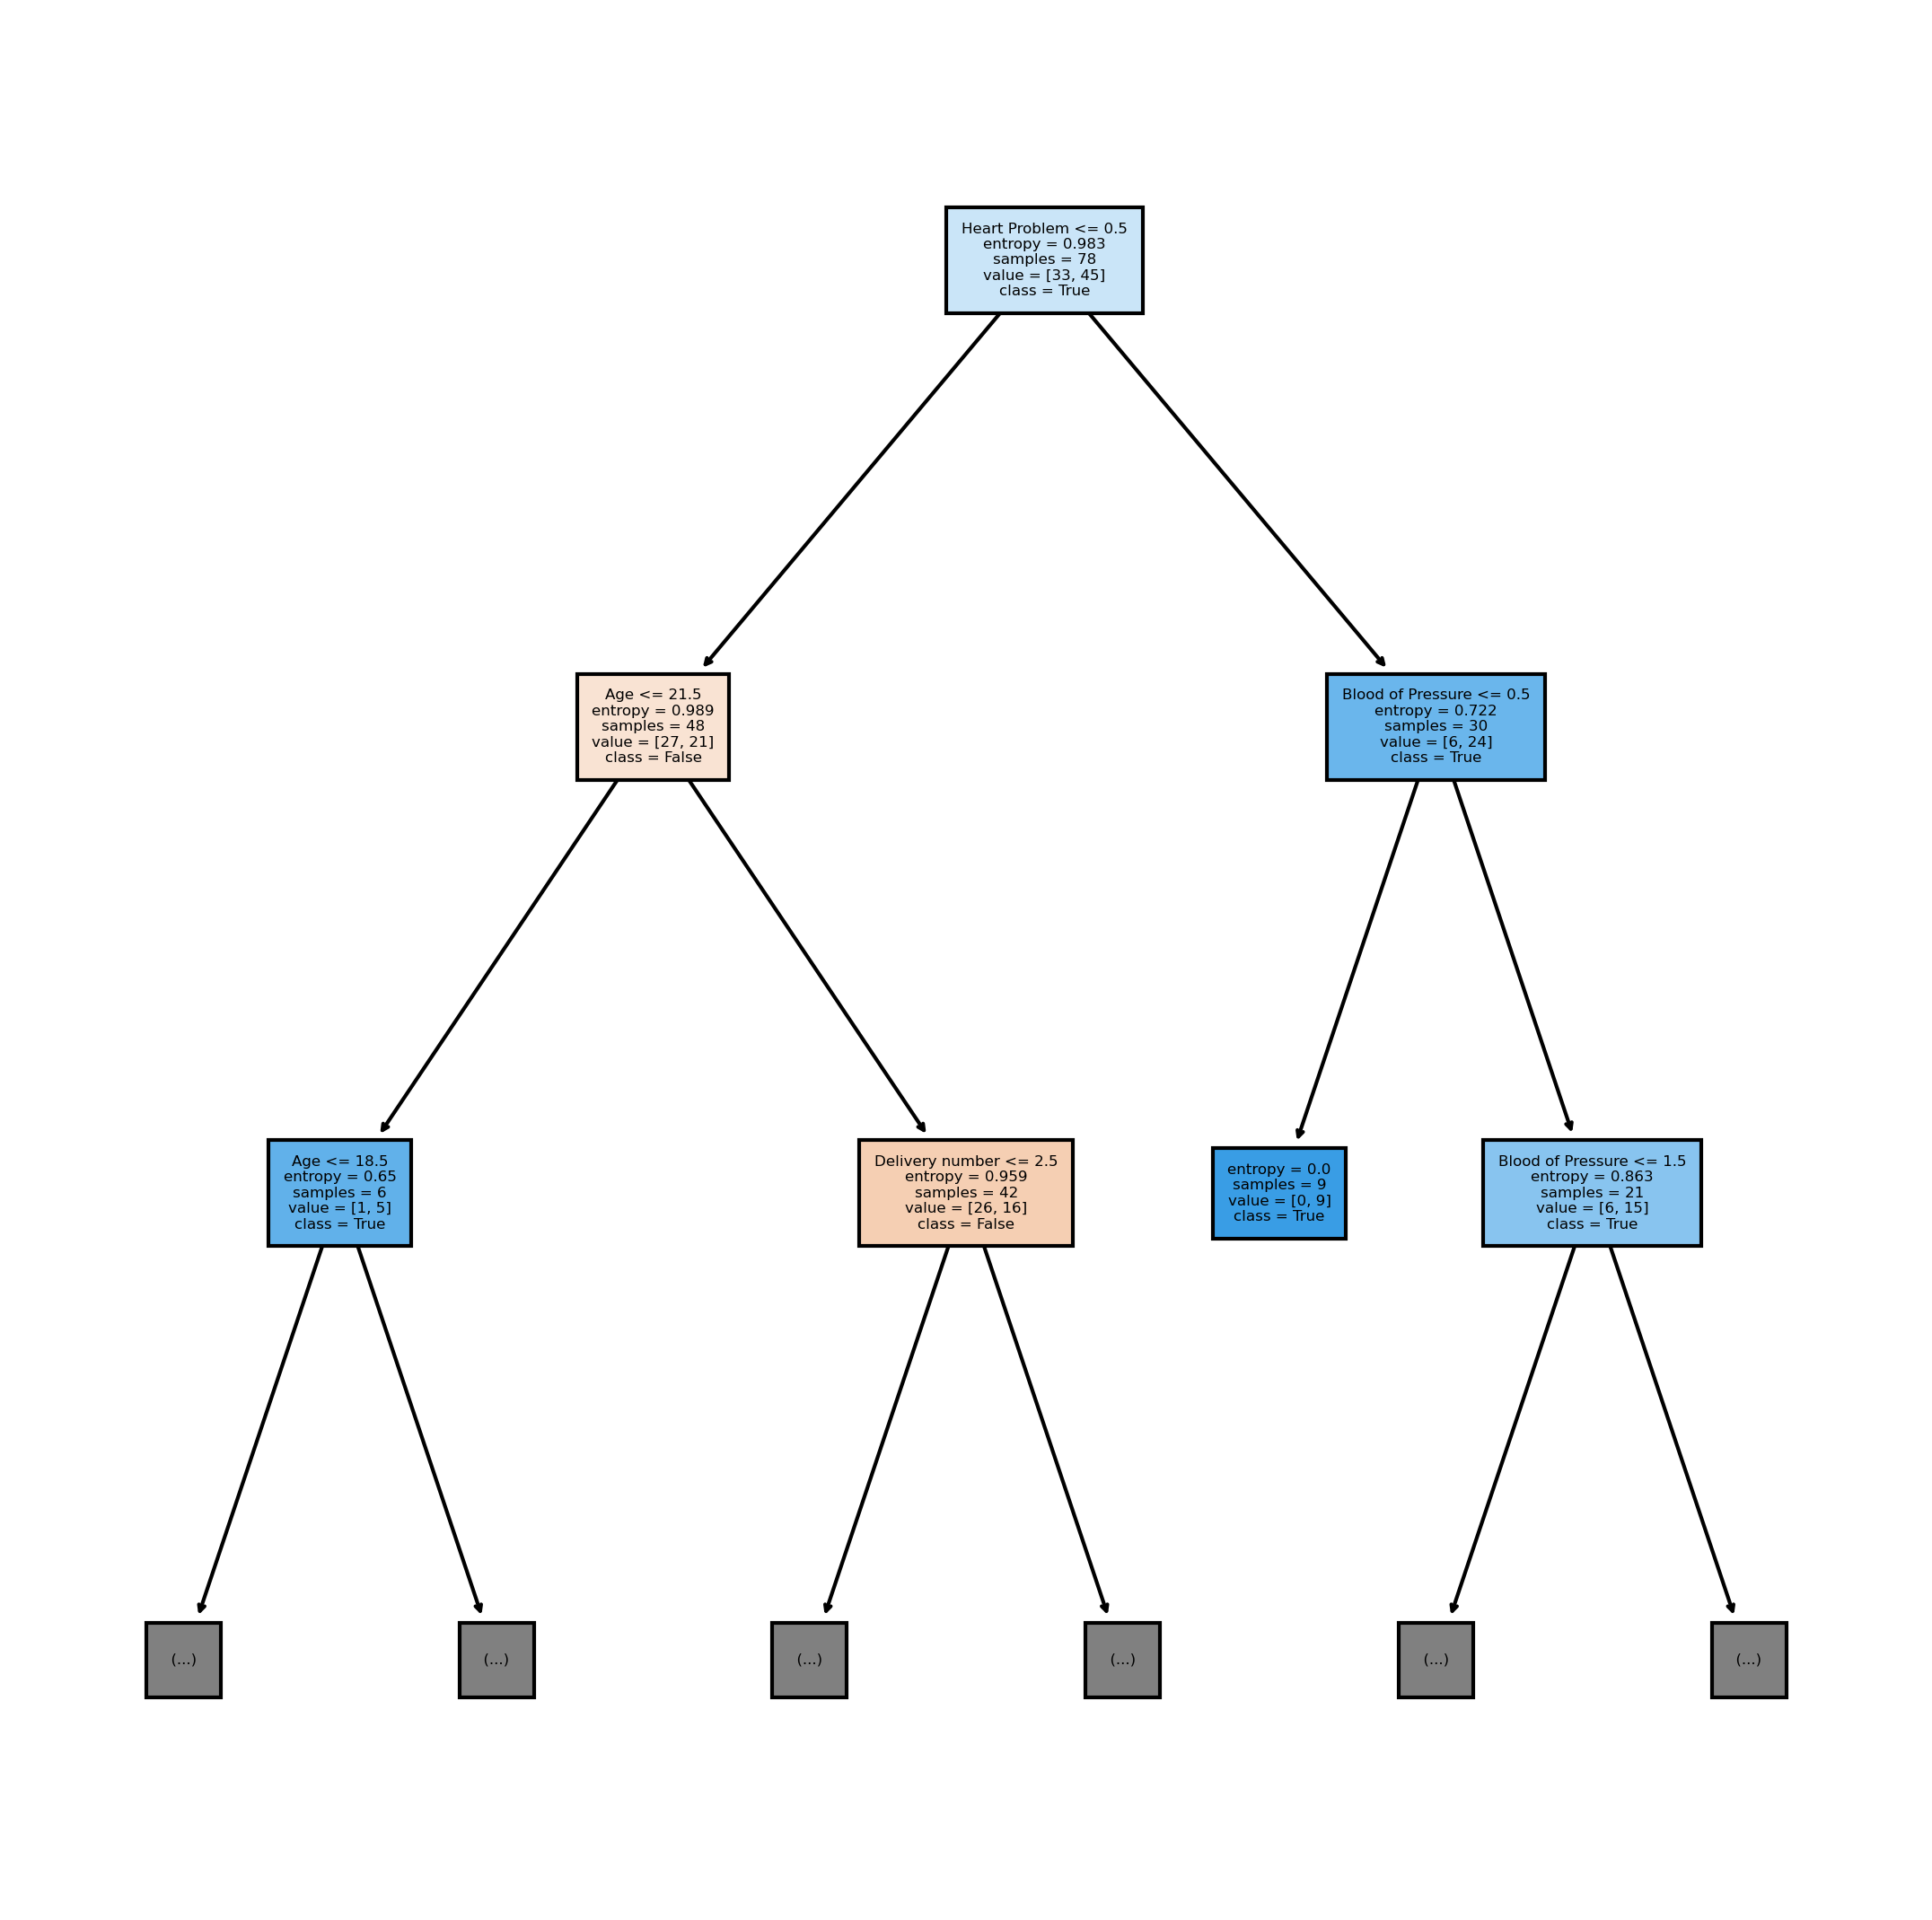

In [25]:
import pandas as pd
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/caesarian.csv"
sd = pd.read_csv(url)

# Prepare the features and target
features_sd = sd.drop(['Caesarian'], axis=1)
target_sd = sd['Caesarian']

# Initialize the Decision Tree Classifier with a maximum depth
sdtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)  # Simplified model with max_depth set to 3

# Fit the model
sdtree.fit(features_sd, target_sd)

# Plot the simplified tree
class_names = target_sd.unique().astype(str)
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300)
plot_tree(sdtree, fontsize=4, filled=True, feature_names=features_sd.columns, class_names=class_names)
plt.show()


Determine the accuracy of the model

In [21]:
predict_sd_array = sdtree.predict(features_sd)
predicted_sd_labels = pd.DataFrame(predict_sd_array)
predicted_sd_labels.columns = ['Caesarian']
predicted_sd_labels.head()

,Caesarian
0,False
1,False
2,False
3,False
4,False


In [22]:
target_sd.head()

0    False
1     True
2    False
3    False
4     True
Name: Caesarian, dtype: bool

In [23]:
predicted_sd_labels.equals(target_sd)

False

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_sd, predicted_sd_labels)
accuracy

0.7435897435897436